# X-Plorers Team - Round 1

## Analysis of Starfruit

By looking at past data, we can see that Starfruit is **very volatile** asset with a lot of fluctuations.

We are gonna use the **Moving Cross Average** to trade this asset. To understand better what it is: https://www.savoirtrader.fr/fr/gagner-en-bourse/article/strategie-de-trading-moving-average-cross-i (article in french)

In [29]:
data0 = pd.read_csv(filepath_or_buffer='../data/prices_round_1_day_0.csv', sep=';')
data1 = pd.read_csv(filepath_or_buffer='../data/prices_round_1_day_-1.csv', sep=';')
data2 = pd.read_csv(filepath_or_buffer='../data/prices_round_1_day_-2.csv', sep=';')

In [30]:
data_starfruit0 = data0.loc[data0['product'] == 'STARFRUIT'].copy()
data_starfruit1 = data1.loc[data1['product'] == 'STARFRUIT'].copy()
data_starfruit2 = data2.loc[data2['product'] == 'STARFRUIT'].copy()

In [31]:
data_starfruit0

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,0,0,STARFRUIT,5036,30,NaN,NaN,NaN,NaN,5043,30,NaN,NaN,NaN,NaN,5039.5,0.0
3,0,100,STARFRUIT,5041,4,5037.0,1.0,5036.0,30.0,5043,31,NaN,NaN,NaN,NaN,5042.0,0.0
5,0,200,STARFRUIT,5037,1,5036.0,21.0,NaN,NaN,5043,1,5044.0,21.0,NaN,NaN,5040.0,0.0
6,0,300,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5044,25,NaN,NaN,NaN,NaN,5040.5,0.0
9,0,400,STARFRUIT,5037,25,NaN,NaN,NaN,NaN,5042,6,5044.0,25.0,NaN,NaN,5039.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0,999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
19992,0,999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


### Spread

In [34]:
data_starfruit0['spread'] = data_starfruit0['bid_price_1'] - data_starfruit0['ask_price_1']
data_starfruit1['spread'] = data_starfruit1['bid_price_1'] - data_starfruit1['ask_price_1']
data_starfruit2['spread'] = data_starfruit2['bid_price_1'] - data_starfruit2['ask_price_1']

In [62]:
data_starfruit0['timestamp'].describe()

count     10000.000000
mean     499950.000000
std      288689.567991
min           0.000000
25%      249975.000000
50%      499950.000000
75%      749925.000000
max      999900.000000
Name: timestamp, dtype: float64

In [63]:
data_starfruit1['timestamp'].describe()

count     10000.000000
mean     499950.000000
std      288689.567991
min           0.000000
25%      249975.000000
50%      499950.000000
75%      749925.000000
max      999900.000000
Name: timestamp, dtype: float64

In [38]:
data_starfruit2['spread'].describe()

count    10000.000000
mean        -5.346400
std          1.935247
min         -8.000000
25%         -7.000000
50%         -6.000000
75%         -5.000000
max         -1.000000
Name: spread, dtype: float64

<Axes: >

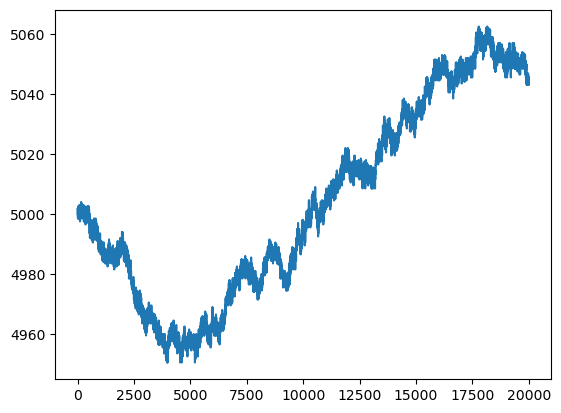

In [42]:
data_starfruit2['mid_price'].plot()

<Axes: >

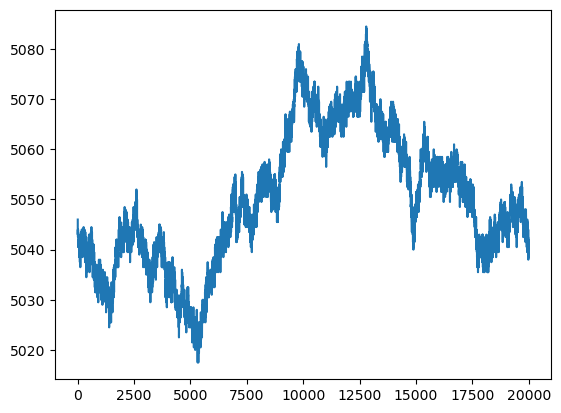

In [74]:
data_starfruit1['mid_price'].plot()

<Axes: xlabel='day'>

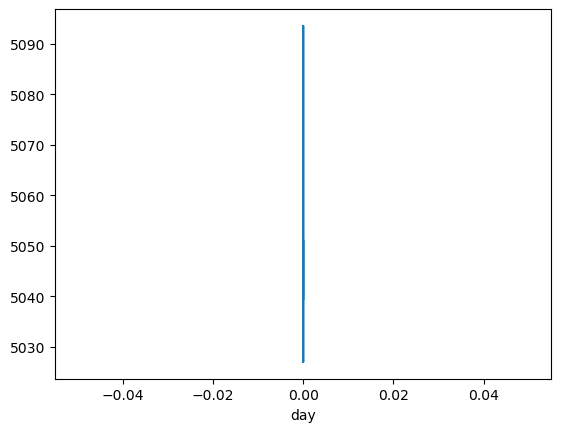

In [75]:
data_starfruit0['mid_price'].plot()

count      10000.000000
mean      500050.000000
std       288689.567991
min          100.000000
25%       250075.000000
50%       500050.000000
75%       750025.000000
max      1000000.000000
Name: timestamp, dtype: float64

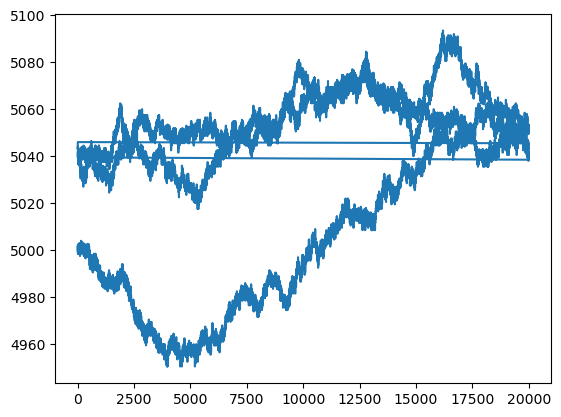

In [67]:
data_starfruit1_modified = data_starfruit1.copy()
data_starfruit0_modified = data_starfruit0.copy()

# Adjust the timestamps in the copies
data_starfruit1_modified['timestamp'] += 100
data_starfruit0_modified['timestamp'] += 999900*2

combined_data_starfruit = pd.concat([data_starfruit2, data_starfruit1_modified, data_starfruit0_modified])
combined_data_starfruit['mid_price'].plot()

data_starfruit1_modified['timestamp'].describe()